# Chapter2: Logistic Regression

<b>Logistic regression</b> class No.2 of machine learning, specifically designed for solving classification problems. The fundamental principle behind logistic regression lies in its ability to estimate the probability of a certain event occurring. By modeling the relationship between a set of independent variables and the probability of an outcome, logistic regression can effectively predict the likelihood of a particular class being assigned to a given data point. 

The basic logistic regression is for binary classification. For multi-class classification problem, we need to use multinomial logistic regression

## Basic Assumptions of Linear Regression

- Binary outcome: two type of X
- Independence of observations: non related, no duplicated X
- Linearity in the logit: X and Y relationship
- No multicollinearity: independent X
- Adequate sample size: enough samples

Sigmoid Function:
$$f(x) = \frac{1}{1 + e^{-g(x)}}$$

## Using stats Package

In [15]:
import statsmodels.formula.api as smf
#df = ...
#fit logistic regression model
model = smf.logit('y ~ x1 + x2', data=df).fit()
model.summary()

## Using Sklearn

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y)
print(model.predict(x))
print(model.intercept_)
print(model.coef_)
print('Accuraty',model.score(x, y))
print(confusion_matrix(y, model.predict(x)))

[0 0 0 1 1 1 1 1 1 1]
[-1.04608067]
[[0.51491375]]
Accuraty 0.9
[[3 1]
 [0 6]]


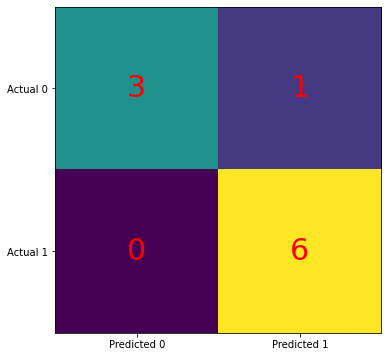

In [17]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red',size = 30)
plt.show()

## From Scratch

In [18]:
class LogisticRegression():                                     
    def __init__(self, learning_rate, iterations):                
        self.learning_rate = learning_rate                          
        self.iterations = iterations                                
    
    #Function for training
    def fit(self, X, y):                             
        self.X = X                                    
        self.y = y                                        
        self.num_train = X.shape[0]                          
        self.num_features = X.shape[1]                       
        self.W, self.b = np.zeros(self.num_features), 0             

        for i in range(self.iterations):
            self.update_weights()
        return 
    
    def sigmoid(self,x):
        sig = 1/(1+np.exp(-x))
        return sig
    # Function for updating weights. 
    def update_weights(self):                                    
        pred = self.sigmoid(self.X.dot(self.W) + self.b)
        diff = (pred - self.y.T)
        diff = np.reshape(diff, self.num_train)
        # gradients for weights
        dW = np.dot(self.X.T, diff) / self.num_train # x * (y-y_pred) / n
        # gradients for biases
        db = np.sum(diff) / self.num_train # (y-y_pred) / n
        # update 
        self.W = self.W - self.learning_rate * dW                  
        self.b = self.b - self.learning_rate * db                  
        return self
    # Function for Predictions.   
    def predict(self, X):                                        
        prob = self.sigmoid(X.dot(self.W) + self.b)
        Y = np.where(prob > 0.5, 1, 0)
        return prob, Y

In [19]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
model = LogisticRegression(0.01,1000)
model.fit(x,y)

In [20]:
model.predict(x)

(array([0.22099616, 0.33513547, 0.47247128, 0.61410386, 0.73873768,
        0.83399923, 0.89926298, 0.94069271, 0.96573306, 0.98042108]),
 array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1]))

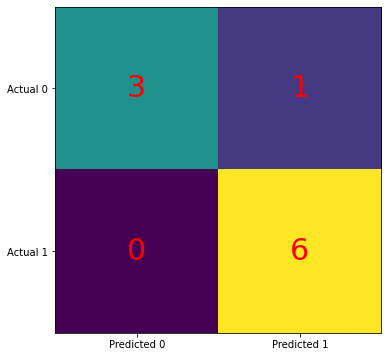

In [21]:
cm = confusion_matrix(y, model.predict(x)[1])

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red',size = 30)
plt.show()

## Derivative

https://towardsdatascience.com/loss-functions-and-their-use-in-neural-networks-a470e703f1e9